# Problem Statement
As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad
campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall
cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better
outcomes for our clients. 

# Research Question
Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn. linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

## Data Description
The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2020. Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. For each day of the year 2020, there is a corresponding row in the dataset, resulting in a total of 365 lines of campaign data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Key features included in the dataset are as follows:

- Date: The date corresponding to each row of campaign data, ranging from January 1st, 2020, to December 31st, 2020. 
- Ad Views: The number of times the ad was viewed.
- Ad Clicks: The number of clicks received on the ad.
- Ad Conversions: The number of conversions resulting from the ad.
- Cost per Ad: The cost associated with running the Facebook ad campaign.
- Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
- Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
- Cost per Click (CPC): The average cost incurred per click on the ad.

In [3]:
df = pd.read_csv('final_data_2020.csv')

In [5]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2020-01-01,FB_Jan20,2199,17,8,$126,0.77%,47.06%,$7.41,AW_Jan20,4747,63,5,$194,1.18%,8.40%,$3.30
1,2020-01-02,FB_Jan20,3395,36,13,$104,1.06%,36.11%,$2.89,AW_Jan20,3712,69,6,$75,1.77%,7.80%,$1.05
2,2020-01-03,FB_Jan20,2952,27,9,$102,0.91%,33.33%,$3.78,AW_Jan20,3586,42,4,$141,1.13%,9.59%,$3.23
3,2020-01-04,FB_Jan20,1196,28,9,$71,2.34%,32.14%,$2.54,AW_Jan20,3695,52,5,$141,1.26%,11.08%,$2.86
4,2020-01-05,FB_Jan20,1392,14,7,$78,1.01%,50.00%,$5.57,AW_Jan20,3733,51,8,$133,1.36%,12.22%,$2.40


In [6]:
df.shape

(365, 17)

In [7]:
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df.dtypes

Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                       object
Facebook Click-Through Rate (Clicks / View)                object
Facebook Conversion Rate (Conversions / Clicks)            object
Facebook Cost per Click (Ad Cost / Clicks)                 object
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                        object
AdWords Click-Through Rate (Clicks / View)                 object
AdWords Co

In [10]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2020-07-01 20:07:13.972602624,2171.882192,44.030137,11.717808,4742.169863,60.386301,6.019178
min,2020-01-01 00:00:00,994.000000,14.000000,5.000000,3467.000000,29.000000,3.000000
25%,2020-04-02 00:00:00,1639.000000,34.000000,10.000000,4251.000000,48.000000,5.000000
50%,2020-07-02 00:00:00,2147.000000,43.000000,12.000000,4764.000000,60.000000,6.000000
75%,2020-10-01 00:00:00,2685.000000,54.000000,14.000000,5168.000000,73.000000,7.000000
max,2020-12-31 00:00:00,3441.000000,76.000000,20.000000,6240.000000,95.000000,10.000000
std,NaN,633.270288,12.388921,3.075039,622.160291,15.071855,1.700732


## Comparing Campaigns Performance

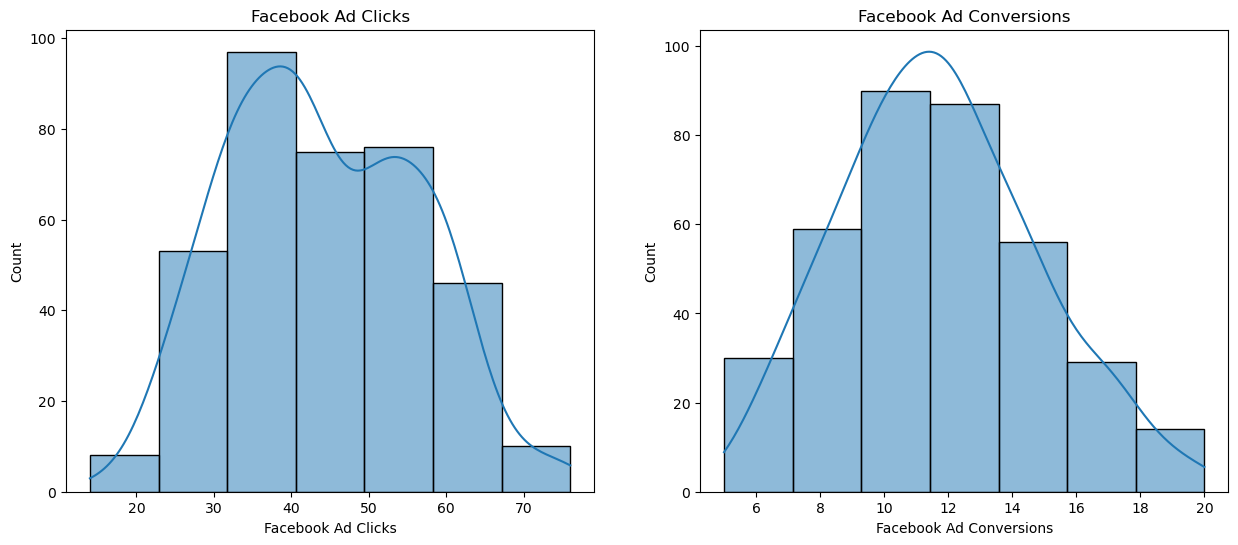

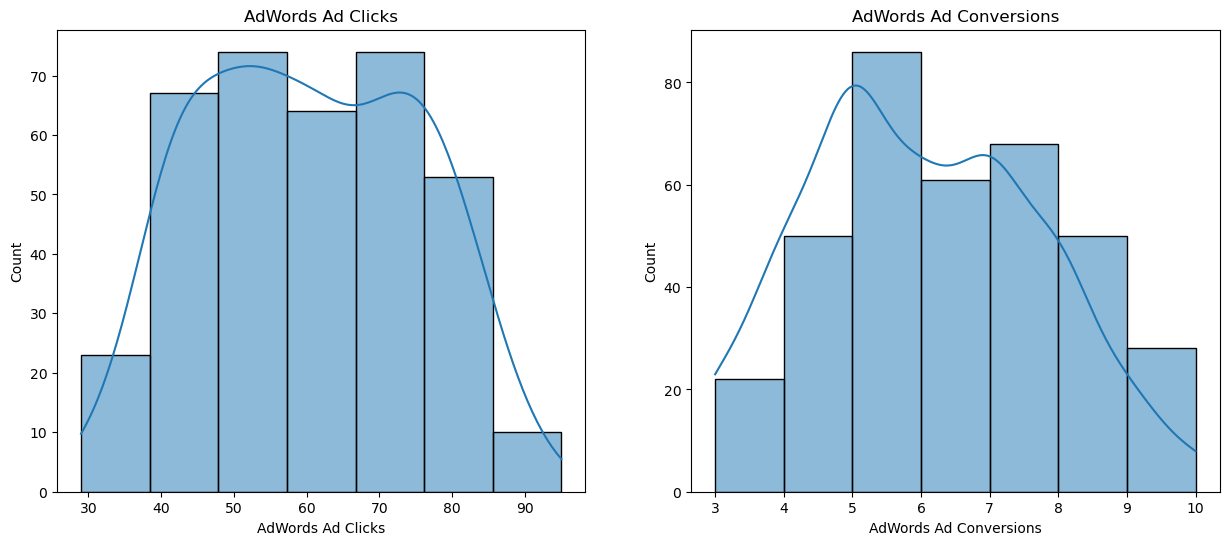

In [11]:
# Distribution of the clicks and conversions

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()


plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

   The distributions of both AdWords and Facebook campaign metrics indicate that AdWord clicks are generally higher in number compared to conversions. Facebook Conversion data demonstrates a near-normal distribution, suggesting stable performance and minimal variance. Conversely, AdWords Conversions show right-skewness, reflecting greater variability in user behavior. Additionally, the AdWords clicks distribution exhibits a wider spread with high-end values exceeding 90, and isolated frequency bars in the upper tail, suggesting the presence of potential mild outliers.

In [12]:
# OUTLIER CHECK

# Assuming your column is named 'adwords_clicks'
Q1 = df['AdWords Ad Clicks'].quantile(0.25)
Q3 = df['AdWords Ad Clicks'].quantile(0.75)
IQR = Q3 - Q1


low_bound = Q1 - 1.5 * IQR
print('Lower bound =',low_bound)
up_bound = Q3 + 1.5 * IQR
print('Upper bound =',up_bound)

outliers = df[(df['AdWords Ad Clicks'] < low_bound) | (df['AdWords Ad Clicks'] > up_bound)]
print("OUTLIERS : ",outliers)


Lower bound = 10.5
Upper bound = 110.5
OUTLIERS :  Empty DataFrame
Columns: [Date, Facebook Ad Campaign, Facebook Ad Views, Facebook Ad Clicks, Facebook Ad Conversions, Cost per Facebook Ad, Facebook Click-Through Rate (Clicks / View), Facebook Conversion Rate (Conversions / Clicks), Facebook Cost per Click (Ad Cost / Clicks), AdWords Ad Campaign, AdWords Ad Views, AdWords Ad Clicks, AdWords Ad Conversions, Cost per AdWords Ad, AdWords Click-Through Rate (Clicks / View), AdWords Conversion Rate (Conversions / Click), AdWords Cost per Click (Ad Cost / Clicks)]
Index: []


 Using the Interquartile Range (IQR) method, the calculated lower and upper bounds for AdWords Ad Clicks are 10.5 and 110.5, respectively. Upon evaluation, no data points fall outside this range, indicating that the dataset contains no statistical outliers for this metric. Although the histogram suggested a few isolated values in the upper range, they remain within acceptable statistical boundaries and do not qualify as outliers.

### How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions ?

In [13]:
# creating function to calculate the category for the conversions
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

# applying function of different campaign's conversions
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [14]:
df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions','AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,13,10 - 15,6,6 - 10
2,9,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,8,6 - 10


In [15]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          131
more than 15     43
less than 6       2
Name: count, dtype: int64

In [16]:
pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index()

,Facebook Conversion Category,count
0,10 - 15,189
1,6 - 10,131
2,more than 15,43
3,less than 6,2


In [17]:
facebook =  pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category':'Category'})
facebook

,Category,count
0,10 - 15,189
1,6 - 10,131
2,more than 15,43
3,less than 6,2


In [18]:
df['AdWords Conversion Category'].value_counts()

AdWords Conversion Category
6 - 10         207
less than 6    158
Name: count, dtype: int64

In [19]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'AdWords Conversion Category':'Category'})
adwords

,Category,count
0,6 - 10,207
1,less than 6,158


In [20]:
category_df = pd.merge(facebook, adwords, on = 'Category', how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,131,207.0
2,more than 15,43,0.0
3,less than 6,2,158.0


In [21]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,count_x,count_y
3,less than 6,2,158.0
1,6 - 10,131,207.0
0,10 - 15,189,0.0
2,more than 15,43,0.0


In [22]:
X_axis = np.arange(len(category_df)) 
X_axis

array([0, 1, 2, 3])

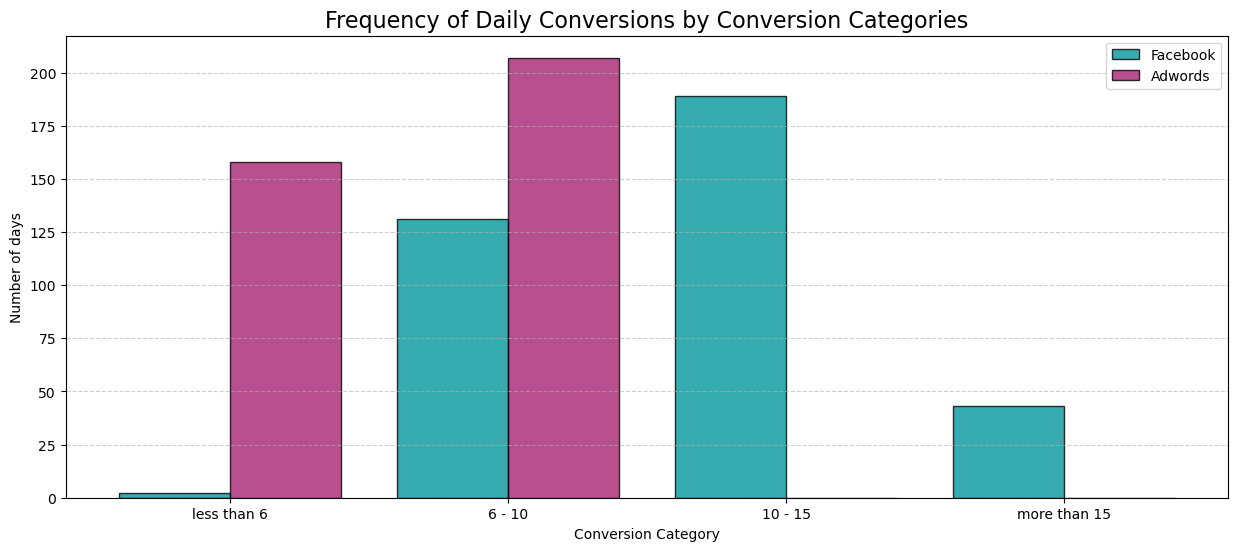

In [25]:
X_axis = np.arange(len(category_df)) 
plt.figure(figsize = (15,6))

plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook', color = '#03989E', linewidth = 1, edgecolor = 'k', alpha = 0.8) 
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label = 'Adwords', color = '#A62372', linewidth = 1, edgecolor = 'k', alpha = 0.8) 
  
plt.xticks(X_axis, category_df['Category']) 
plt.xlabel("Conversion Category") 
plt.ylabel("Number of days") 
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 16) 
plt.legend(fontsize = 10) 
plt.grid(True, linestyle='--', alpha = 0.6, axis ='y')
plt.show() 

- Facebook shows stronger performance in higher conversion categories, especially in the 10–15 range. In contrast, AdWords conversions are concentrated in the 6–10 and less than 6 categories, suggesting relatively lower conversion efficiency over time.
- There is a significant variance in the number of high-conversion days between two different campaigns.
- The absence of any days with conversions between 10 - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

### Do more clicks on the ad really lead to more sales?

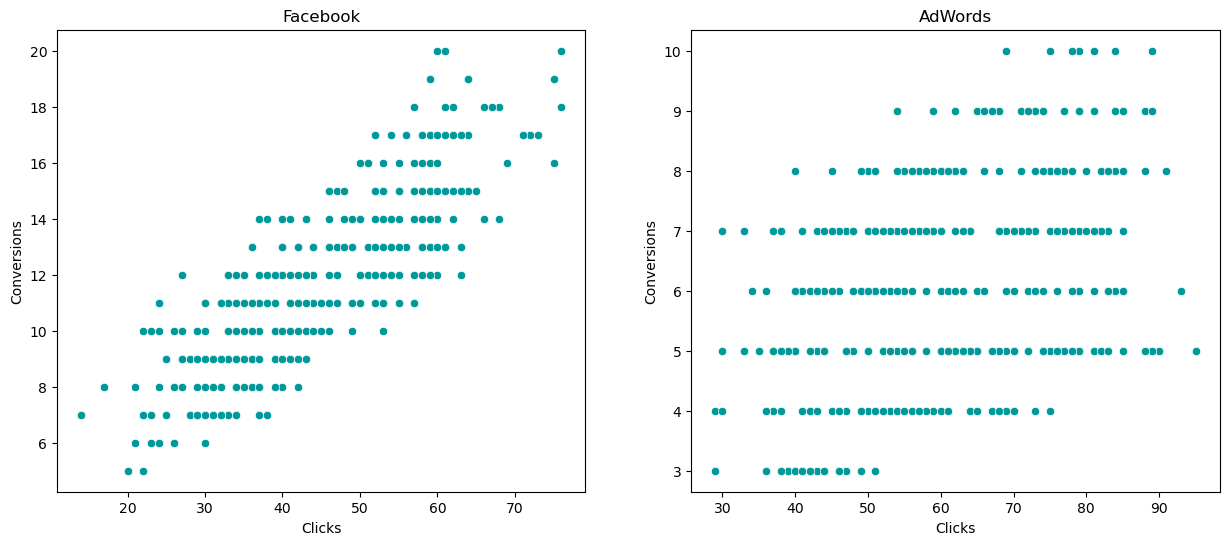

In [114]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#009999')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'],y = df['AdWords Ad Conversions'], color = '#009999')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [115]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.834213
Facebook Ad Clicks,0.834213,1.000000


In [116]:
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.446633
AdWords Ad Clicks,0.446633,1.000000


In [117]:
print('Correlation Coeff \n--------------')
print('Facebook :',round(facebook_corr.values[0,1],2))
print('AdWords : ',round(adwords_corr.values[0,1],2))

Correlation Coeff 
--------------
Facebook : 0.83
AdWords :  0.45


**Facebook Campaigns:**
- Shows a **strong positive correlation** between clicks and conversions (correlation coefficient( r ) = 0.83).
- The scatter plot exhibits a clear upward trend, indicating that more clicks typically lead to more conversions.
- Suggests efficient conversion performance as user engagement increases.

**AdWords Campaigns:**
- Displays a moderate correlation between clicks and conversions (r = 0.45).
- The scatter plot is more dispersed, showing less consistent growth in conversions with increasing clicks.
- Implies lower conversion efficiency compared to Facebook, with higher variability in performance.

## Hypothesis Testing

**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords. 

**Null Hypothesis (H0):** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.  

H0: $\mu_{Facebook} \leq \mu_{AdWords}$  

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conversions from AdWords.

H1: $\mu_{Facebook} > \mu_{AdWords}$


In [26]:
print('Mean Conversion \n----------------------------------------------')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords :', round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic :', t_stats, '\np-value :',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Mean Conversion 
----------------------------------------------
Facebook : 11.72
AdWords : 6.02

T statistic : 30.982211081749405 
p-value : 4.0353255129496346e-124

p-value is less than significance value, Reject the null hypothesis


- The average number of conversions from Facebook ads (11.72) is substantially higher than that from AdWords ads (6.02), suggesting that Facebook is more effective in driving conversions.

- The T statistic (30.98) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.

- The p-value (4.04e-124) is small, indicating strong evidence against the null hypothesis.

- These results support the alternative hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.

- Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.

- Based on this evidence, it would be advisable to prioritize Facebook advertising, potentially by increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to further improve conversion outcomes.


## Regression Analysis
### What will happen when I do go with the Facebook Ad? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?

In [27]:
# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 Score): 69.59 %
Mean Squared Error: 2.87


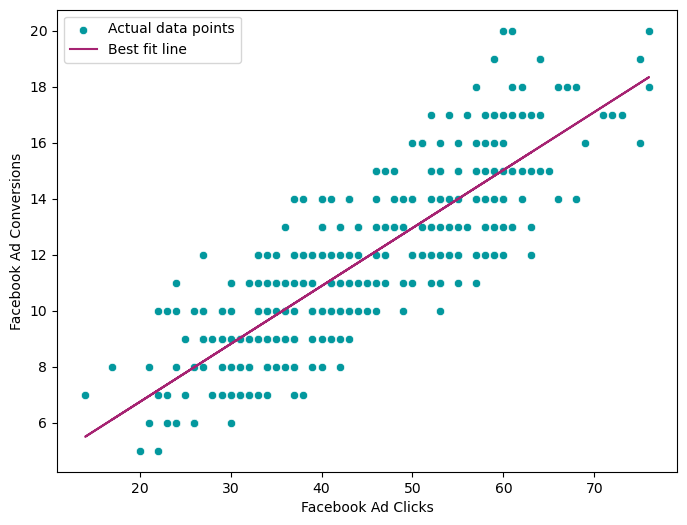

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()

In [121]:
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0],2)}')

For 50 Clicks, Expected Conversion : 12.95
For 80 Clicks, Expected Conversion : 19.17


The linear regression model shows **strong predictive capability**, with an **$R^2$ score of 69.59%** and a **mean squared error (MSE) of 2.87**. This indicates that approximately **70% of the variation in Facebook ad conversions** can be explained by the number of Facebook ad clicks.

These predictions can help in:
- **Setting realistic campaign goals**
- **Planning budgets effectively**
- **Optimizing Facebook ad spend**
- **Estimating ROI** with greater confidence

The model provides a valuable tool for **data-driven decision making** in Facebook advertising strategy.


In [36]:
# cleaning data ( removing unwanted symbols from the columns and converting them to numerical columns)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))

In [37]:
# filtering for facebook campaign
df = df[['Date','Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2020-01-01,2199,17,8,126.0,0.77,47.06,7.41
1,2020-01-02,3395,36,13,104.0,1.06,36.11,2.89
2,2020-01-03,2952,27,9,102.0,0.91,33.33,3.78
3,2020-01-04,1196,28,9,71.0,2.34,32.14,2.54
4,2020-01-05,1392,14,7,78.0,1.01,50.00,5.57


###  At what times of the month or days of the week do we observe the conversions?

In [38]:
# extracting month and week day from the date column
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

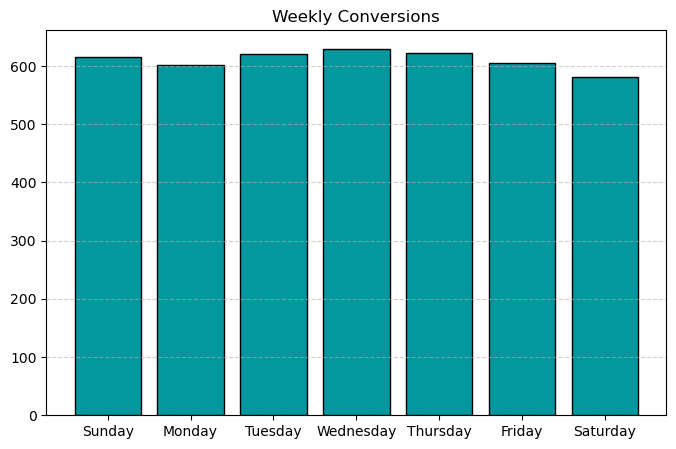

In [39]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = '#03989E', edgecolor = 'k')
plt.grid(True, linestyle='--', alpha = 0.6, axis ='y')
plt.show()

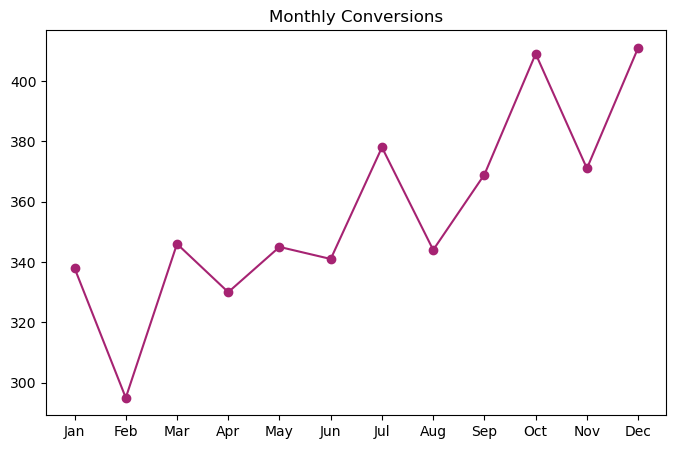

In [40]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'],'-o', color = '#A62372')
plt.show()

- Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week. However, Mondays and Tuesdays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.
- Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. February, April, May, June, August, and November experience a decline in conversions compared to neighboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies.

#### Weekly Trends
- Facebook ad conversions remain fairly consistent across all weekdays, indicating steady user engagement throughout the week.
- **Wednesday**, **Tuesday**, and **Thursday** show the **highest conversion totals**, suggesting that **midweek** is the most effective window for running ads.
- **Saturday** has the **lowest total conversions**, pointing to reduced engagement during weekends.
#### Monthly Trends
- There is an **overall upward trend** in monthly conversions, reflecting growing campaign performance over the year.
- **October** and **December** stand out with **peak conversions**, possibly due to end-of-year promotions or holiday-related ad campaigns.
- **February** has the **lowest conversion total**, likely due to fewer days and potential seasonal effects.
- Slight dips are observed in April, June, and August, which could be influenced by seasonal trends, audience behavior changes, or adjustments in marketing strategies**.



#### How does the Cost Per Conversion (CPC) trend over time?
Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

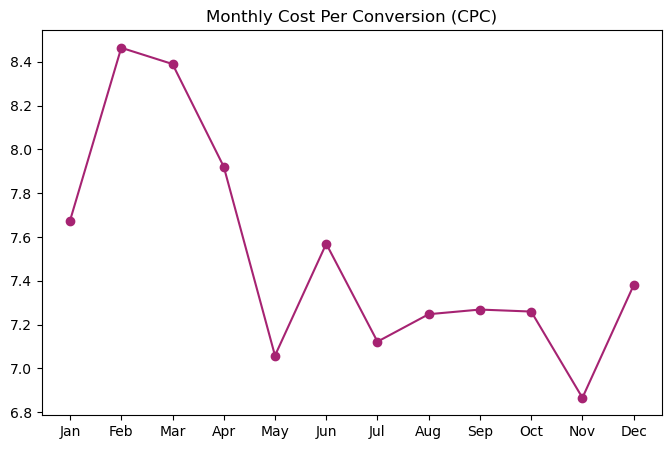

In [41]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby('month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'],'-o', color = '#A62372')
plt.show()

- The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.
- May and November have the lowest CPC values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.
- February and March has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.
- From July to October, the CPC remains fairly stable and moderately low, reflecting consistent ad performance.
- Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market conditions.
- Consider allocating more advertising budget to months with historically lower CPC values (e.g., May and November) to maximize ROI.
- A slight rise in December’s CPC may reflect increased competition or ad spend typical of end-of-year campaigns.

### Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [128]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.765273480343845
P-value: 2.0618784360750368e-26

p-value is less than significance value, Reject the null hypothesis


- Since the p-value is smaller than the significance level (0.05), we reject the null hypothesis. This means there is a **long-term equilibrium relationship** between advertising spend (cost) and conversions.

- This suggests that over time, changes in ad spend are closely linked to changes in conversions. Businesses can use this stable relationship to plan and adjust their budgets more effectively.

- By monitoring performance and making data-driven adjustments to ad spend, companies can improve conversion rates and make better use of their advertising budget.
